In [3]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from satpy import Scene, find_files_and_readers
from datetime import datetime
import os
from glob import glob
import cartopy.crs as ccrs
import cmocean
import matplotlib.pyplot as plt

In [7]:
cmocean.cm.cmapnames
cmaps = cmocean.cm.algae

AttributeError: module 'cmocean' has no attribute 'plots'

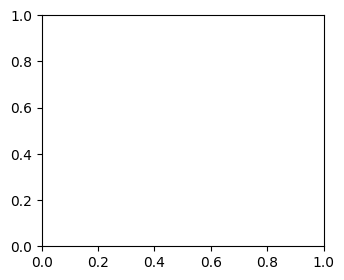

In [4]:
fig = plt.figure(figsize=(8, 3))
ax = fig.add_subplot(1, 2, 1)
cmocean.plots.test(cmocean.cm.thermal, ax=ax)
ax = fig.add_subplot(1, 2, 2)
cmocean.plots.quick_plot(cmocean.cm.algae, ax=ax)

In [110]:
xr.set_options(display_max_rows=999)

In [55]:
SAFE_directory = os.path.join(os.getcwd(), 'data')

In [56]:
print(SAFE_directory)

c:\Kodning\nodc_se-visualizations\data


In [ ]:
band_vars_1 = xr.open_dataset('data\S3A_OL_2_WFR____20240305T092858_20240305T093158_20240305T112916_0180_109_364_1980_MAR_O_NR_003.SEN3/chl_nn.nc')
print(band_vars_1)

In [113]:
geo_file = os.path.join(SAFE_directory,'*.SEN3/geo_coordinates.nc')
geo_fid = xr.open_mfdataset(geo_file, concat_dim=[pd.Index(np.arange(2), name="index_dim")], combine='nested', data_vars='minimal', coords='minimal', compat='override')
lon = geo_fid.longitude.data
lat = geo_fid.latitude.data
print(geo_fid)
geo_fid.close()

<xarray.Dataset> Size: 398MB
Dimensions:    (rows: 4091, columns: 4865, index_dim: 2)
Coordinates:
  * index_dim  (index_dim) int32 8B 0 1
Dimensions without coordinates: rows, columns
Data variables:
    altitude   (rows, columns) float32 80MB dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    latitude   (rows, columns) float64 159MB dask.array<chunksize=(819, 973), meta=np.ndarray>
    longitude  (rows, columns) float64 159MB dask.array<chunksize=(819, 973), meta=np.ndarray>
Attributes:
    absolute_orbit_number:  41917
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2024-03-05T11:29:16Z
    history:                  2024-03-05T11:29:16Z: PUGCoreProcessor /data/ip...
    institution:            MAR
    netCDF_version:         4.2 of Apr 12 2021 08:07:42 $
    processing_baseline:    OL__L2M.003.04.00
    product_name:           S3A_OL_2_WFR____20240305T092858_20240

In [83]:
# time_file = os.path.join(SAFE_directory,
#                          'S3A_OL_2_WFR____20240305T092858_20240305T093158_20240305T112916_0180_109_364_1980_MAR_O_NR_003.SEN3/time_coordinates.nc')
time_file = os.path.join(SAFE_directory,'*.SEN3/time_coordinates.nc')
time_fid = xr.open_mfdataset(time_file, concat_dim=[pd.Index(np.arange(2), name="index_dim")], combine='nested', data_vars='minimal', coords='minimal', compat='override')
print(time_fid)
time_fid.close()

<xarray.Dataset> Size: 33kB
Dimensions:     (rows: 4091, index_dim: 2)
Coordinates:
  * index_dim   (index_dim) int32 8B 0 1
Dimensions without coordinates: rows
Data variables:
    time_stamp  (rows) datetime64[ns] 33kB dask.array<chunksize=(4091,), meta=np.ndarray>
Attributes: (12/17)
    absolute_orbit_number:  41917
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2024-03-05T11:29:16Z
    ...                     ...
    references:             S3IPF PDS 004.3 - i2r5 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-2 07.04
    start_time:             2024-03-05T09:28:58.061510Z
    stop_time:              2024-03-05T09:31:58.026557Z
    title:                  OLCI Level 2 WATER Product, Time Stamps Data Set


In [87]:
time_stamp = time_fid.time_stamp.data
print(time_stamp)

dask.array<open_dataset-time_stamp, shape=(4091,), dtype=datetime64[ns], chunksize=(4091,), chunktype=numpy.ndarray>


In [95]:
print(glob(os.path.join(SAFE_directory,'*.SEN3/chl_nn.nc')))

['c:\\Kodning\\nodc_se-visualizations\\data\\S3A_OL_2_WFR____20240305T092858_20240305T093158_20240305T112916_0180_109_364_1980_MAR_O_NR_003.SEN3\\chl_nn.nc', 'c:\\Kodning\\nodc_se-visualizations\\data\\S3B_OL_2_WFR____20240304T091614_20240304T091914_20240304T111612_0179_090_207_1980_MAR_O_NR_003.SEN3\\chl_nn.nc']


In [111]:
# transformera dataseten till samma area först innan mfdataset
band_vars = xr.open_mfdataset(glob(os.path.join(SAFE_directory,'*.SEN3/chl_nn.nc')), concat_dim=[pd.Index(np.arange(2), name="index_dim")], combine='nested')
print(band_vars)

<xarray.Dataset> Size: 318MB
Dimensions:     (index_dim: 2, rows: 4091, columns: 4865)
Coordinates:
  * index_dim   (index_dim) int32 8B 0 1
Dimensions without coordinates: rows, columns
Data variables:
    CHL_NN      (index_dim, rows, columns) float32 159MB dask.array<chunksize=(1, 1364, 1622), meta=np.ndarray>
    CHL_NN_unc  (index_dim, rows, columns) float32 159MB dask.array<chunksize=(1, 1364, 1622), meta=np.ndarray>
Attributes:
    absolute_orbit_number:  41917
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2024-03-05T11:29:16Z
    history:                  2024-03-05T11:29:16Z: PUGCoreProcessor /data/ip...
    institution:            MAR
    netCDF_version:         4.2 of Apr 12 2021 08:07:42 $
    processing_baseline:    OL__L2M.003.04.00
    product_name:           S3A_OL_2_WFR____20240305T092858_20240305T093158_2...
    references:             S3IPF PDS 004.3 

In [122]:
mean_band_vars = band_vars.mean(dim='index_dim')

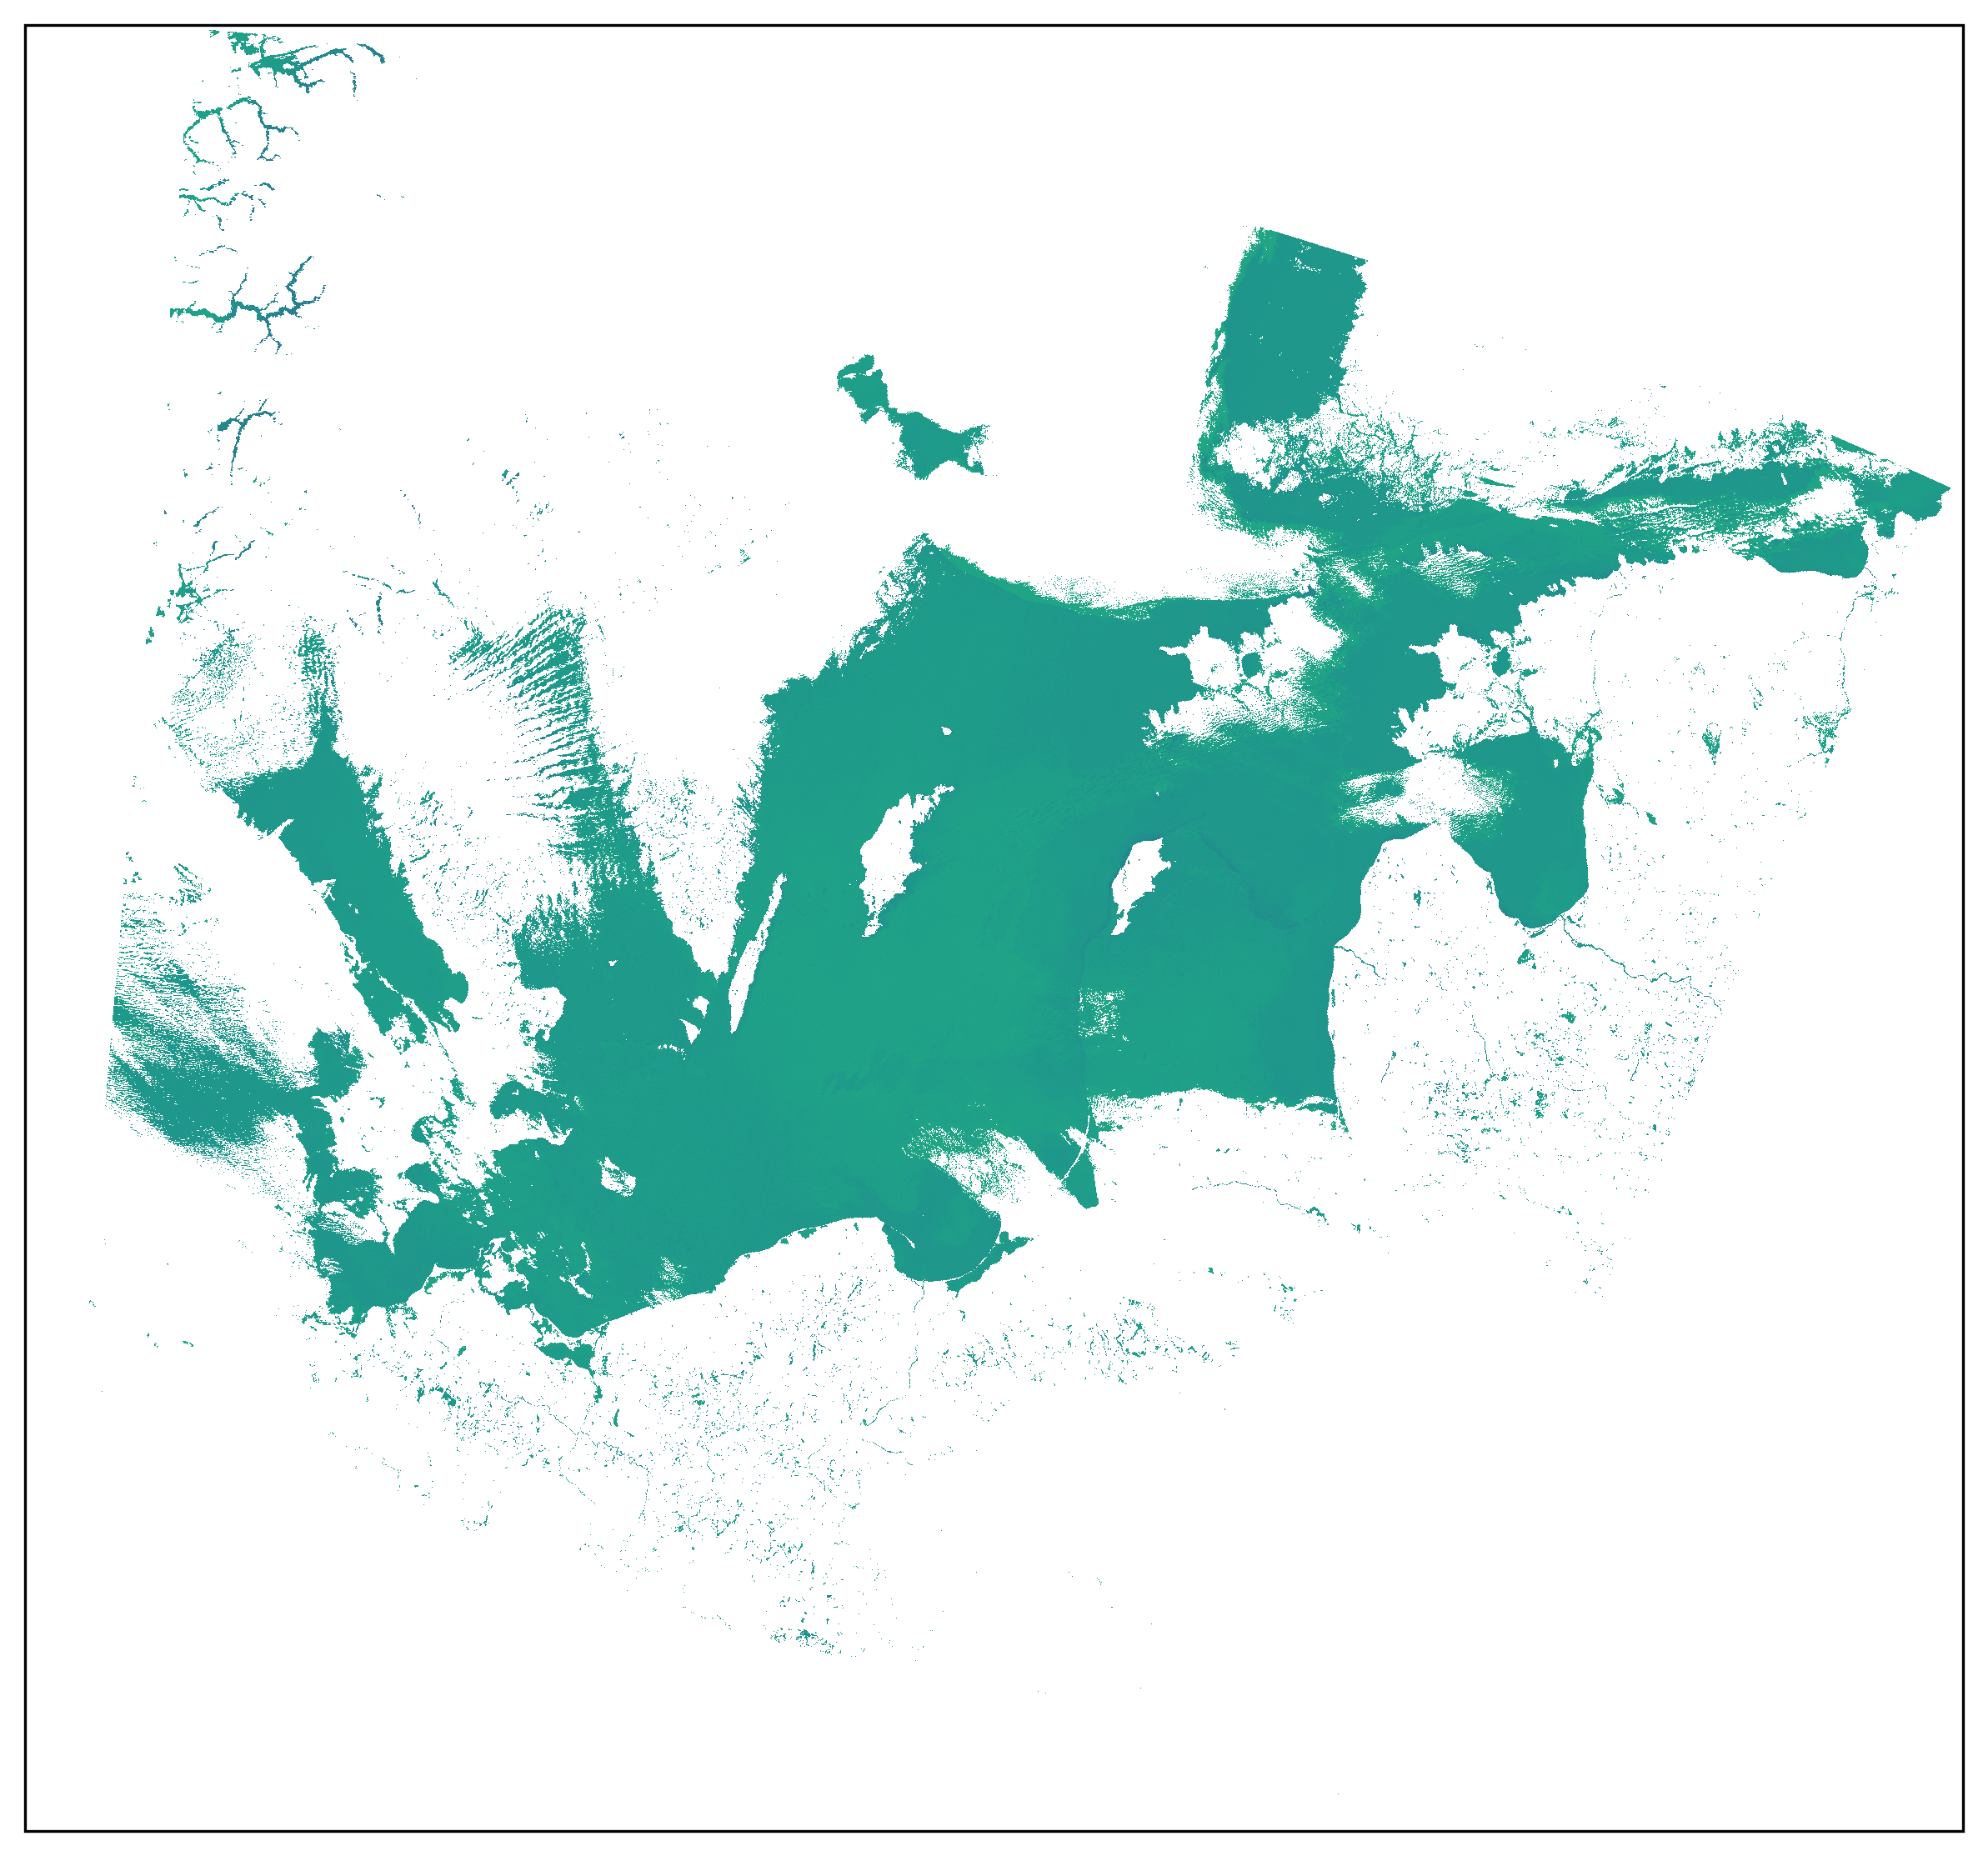

In [125]:
fig = plt.figure(figsize=(10, 10), dpi=300)
m = plt.subplot(projection=ccrs.Mercator())

p1 = m.pcolormesh(lon, lat, band_vars['CHL_NN'].mean(dim='index_dim'), transform=ccrs.PlateCarree(), 
                       cmap=plt.cm.viridis, vmin=-10, vmax=10, zorder=1)

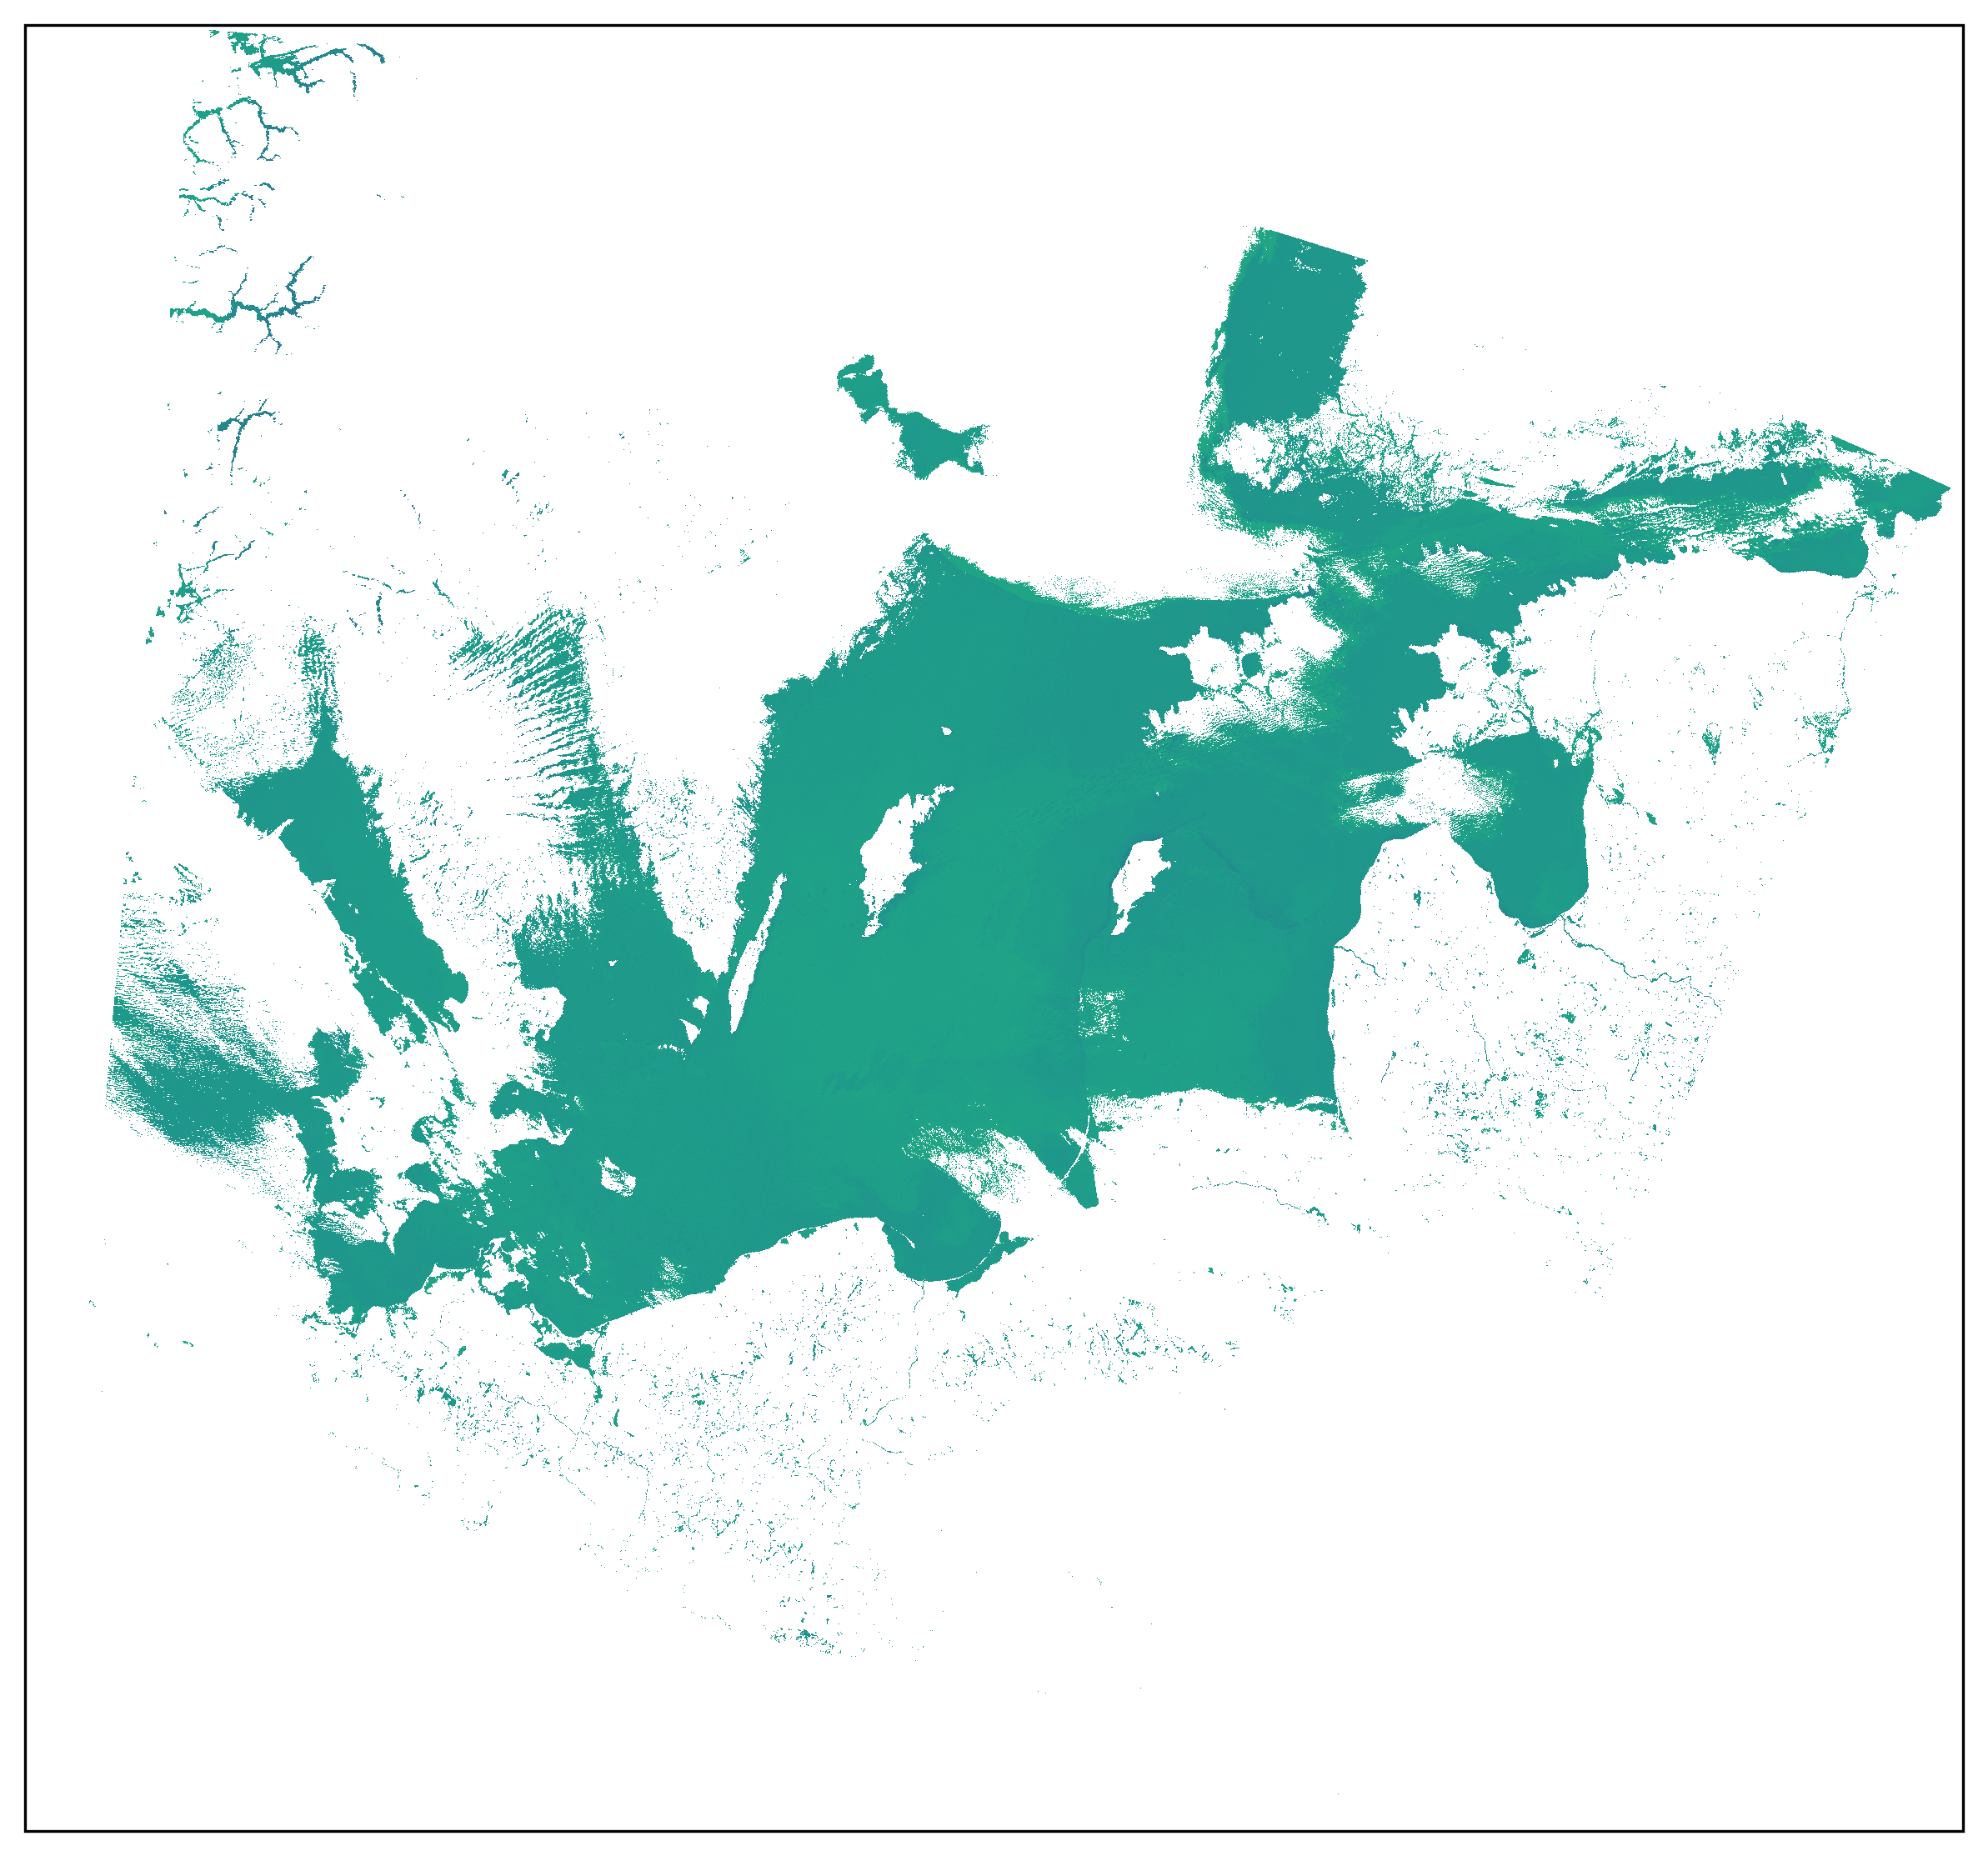

In [126]:
fig = plt.figure(figsize=(10, 10), dpi=300)
m = plt.subplot(projection=ccrs.Mercator())

p1 = m.pcolormesh(lon, lat, band_vars['CHL_NN'].mean(dim='index_dim'), transform=ccrs.PlateCarree(), 
                       cmap=plt.cm.viridis, vmin=-10, vmax=10, zorder=1)